In [491]:
from matplotlib.widgets import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
import statistics
import re
import matplotlib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import pickle
import json

In [492]:
housing=pd.read_csv('Bengaluru_House_Data.csv')
housing

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [493]:
housing.shape

(13320, 9)

In [494]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [495]:
housing.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [496]:
housing.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [497]:
housing.drop(['availability','area_type','society','balcony'],axis='columns',inplace=True)

In [498]:
housing.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [499]:
housing.fillna(housing.bath.median(),axis='columns',inplace=True)

In [500]:
housing.dropna(inplace=True)

In [501]:
housing.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [502]:
housing['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 2.0, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [503]:
housing['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [504]:
housing['bhk']=housing['size'].apply(lambda x : str(x).split(' ')[0])

In [505]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    13320 non-null  object
 1   size        13320 non-null  object
 2   total_sqft  13320 non-null  object
 3   bath        13320 non-null  object
 4   price       13320 non-null  object
 5   bhk         13320 non-null  object
dtypes: object(6)
memory usage: 624.5+ KB


In [506]:
housing['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13320, dtype: object

In [507]:
housing['bhk']= pd.to_numeric(housing['bhk']).astype('Int64')

In [508]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    13320 non-null  object
 1   size        13320 non-null  object
 2   total_sqft  13320 non-null  object
 3   bath        13320 non-null  object
 4   price       13320 non-null  object
 5   bhk         13320 non-null  Int64 
dtypes: Int64(1), object(5)
memory usage: 637.5+ KB


In [509]:
housing

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.0,4
2,Uttarahalli,3 BHK,1440,2.0,62.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.0,3
4,Kothanur,2 BHK,1200,2.0,51.0,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.0,5
13316,Richards Town,4 BHK,3600,5.0,400.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0,4


In [510]:
housing['bath']= pd.to_numeric(housing['bath']).astype('Int64')

In [511]:
housing.drop(['size'],inplace=True,axis='columns')

In [512]:
housing['price']= pd.to_numeric(housing['price'])

In [513]:
def is_float(x):
    try:
        # If it's a simple float number
        float(x)
        return True
    except:
        try:
            # If it's a range (e.g., "1000 - 1200")
            nums = [float(i) for i in re.split(r'[ -]+', x) if i]
            if len(nums) > 0:
                return True
            return False
        except:
            return False

# Check which values are convertible to float
housing['is_float'] = housing['total_sqft'].apply(is_float)
print("Number of non-float values:", (~housing['is_float']).sum())
print("\nSome examples of non-float values:")
print(housing[~housing['is_float']]['total_sqft'].head())

Number of non-float values: 46

Some examples of non-float values:
410     34.46Sq. Meter
648          4125Perch
775      1000Sq. Meter
872      1100Sq. Yards
1019         5.31Acres
Name: total_sqft, dtype: object


In [514]:
housing['total_sqft'] = housing['total_sqft'].str.replace(r'[^0-9.]', '', regex=True)
housing['total_sqft'] = housing['total_sqft'].str.replace(r'\.(?=.*\.)', '', regex=True) 

In [515]:
housing.drop(['is_float'],axis='columns',inplace=True)

In [516]:
housing['total_sqft']=housing['total_sqft'].astype('float')

In [517]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   total_sqft  13320 non-null  float64
 2   bath        13320 non-null  Int64  
 3   price       13320 non-null  float64
 4   bhk         13320 non-null  Int64  
dtypes: Int64(2), float64(2), object(1)
memory usage: 546.5+ KB


In [518]:
housing['price_per_sqft']=housing.price*100000/housing.total_sqft

In [519]:
housing

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13316,Richards Town,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [520]:
len(housing['location'].unique())

1306

In [521]:
housing.location=housing.location.apply(lambda x: str(x).strip())

In [522]:
locations=housing.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [523]:
location_less_than_10=locations[locations<=10]
location_less_than_10

location
Ganga Nagar              10
Dodsworth Layout         10
Kalkere                  10
Sector 1 HSR Layout      10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road           1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1054, dtype: int64

In [524]:
housing.location=housing.location.apply(lambda x:'other' if x in location_less_than_10 else x)

In [525]:
len(housing.location.unique())

242

In [526]:
housing=housing[~(housing.total_sqft/housing.bhk<300)]  #~ is negating

In [527]:
housing.shape

(12550, 6)

In [528]:
housing.price_per_sqft.describe()

count     12550.000000
mean       6216.576675
std        4229.291743
min           0.004717
25%        4166.666667
50%        5263.157895
75%        6894.292302
max      176470.588235
Name: price_per_sqft, dtype: float64

In [529]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
housing=remove_outliers(housing)
housing.shape

(10448, 6)

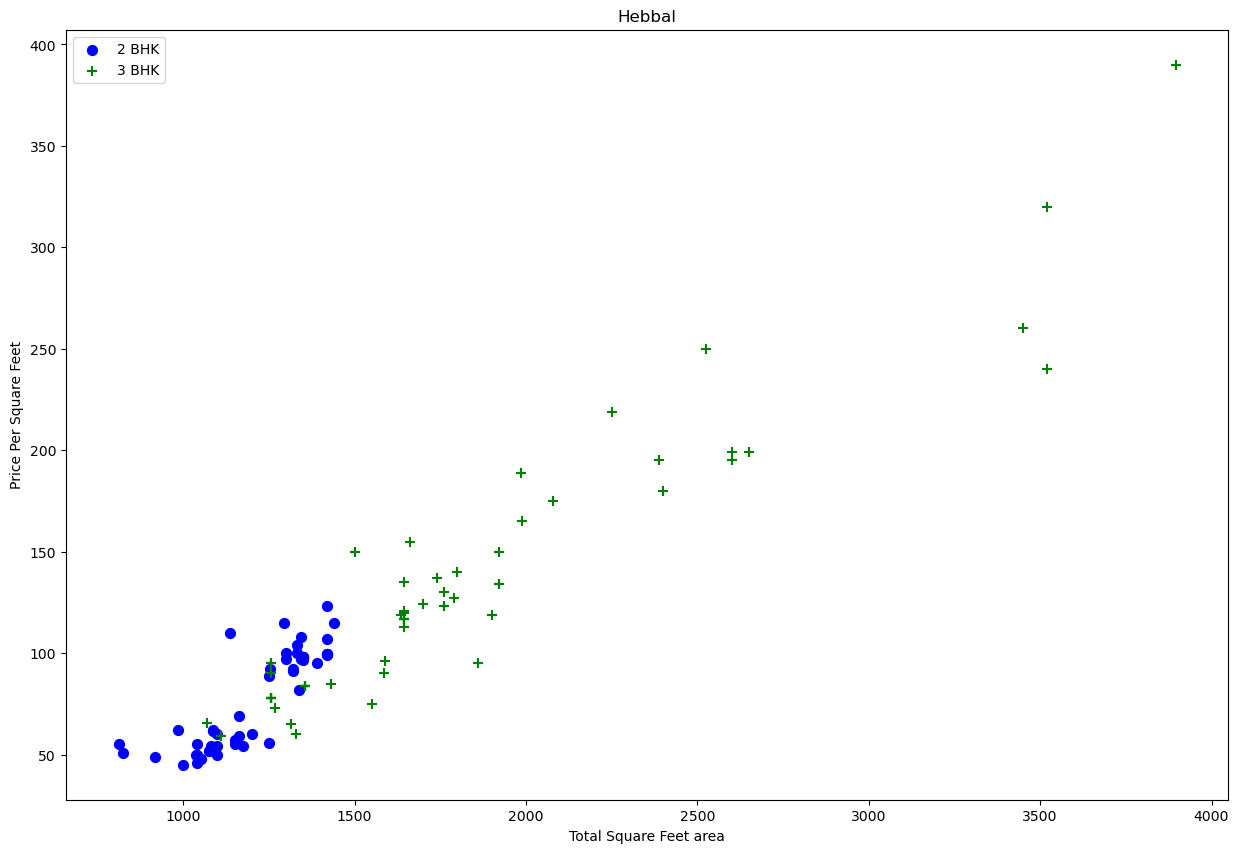

In [530]:
def plot_scatted_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

plot_scatted_chart(housing,'Hebbal')

In [531]:
def remove_bhk_outliers(df):
    exclude=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude=np.append(exclude,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index_values)
            return df.drop(exclude,axis='index')
        
housing=remove_bhk_outliers(housing)
housing.shape

(10448, 6)

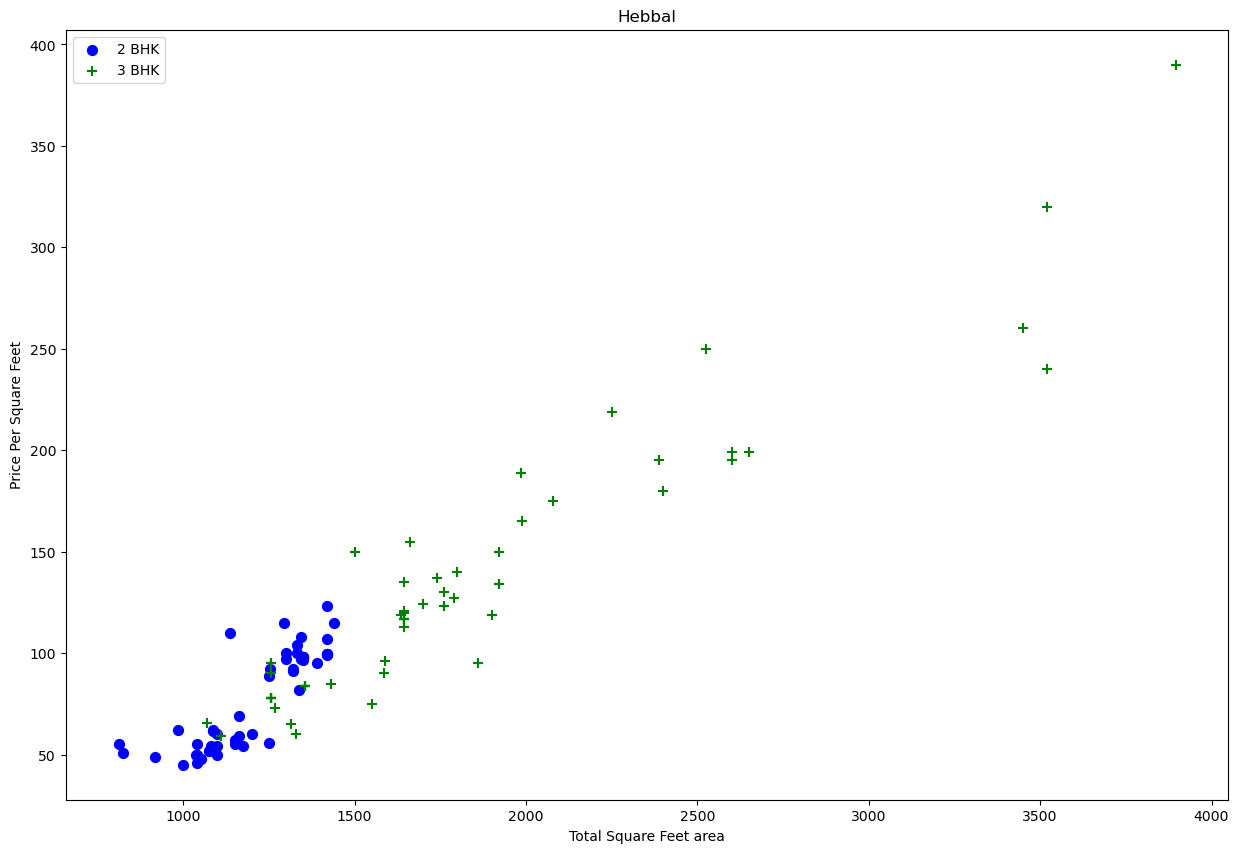

In [532]:
plot_scatted_chart(housing,'Hebbal')

Text(0, 0.5, 'Count')

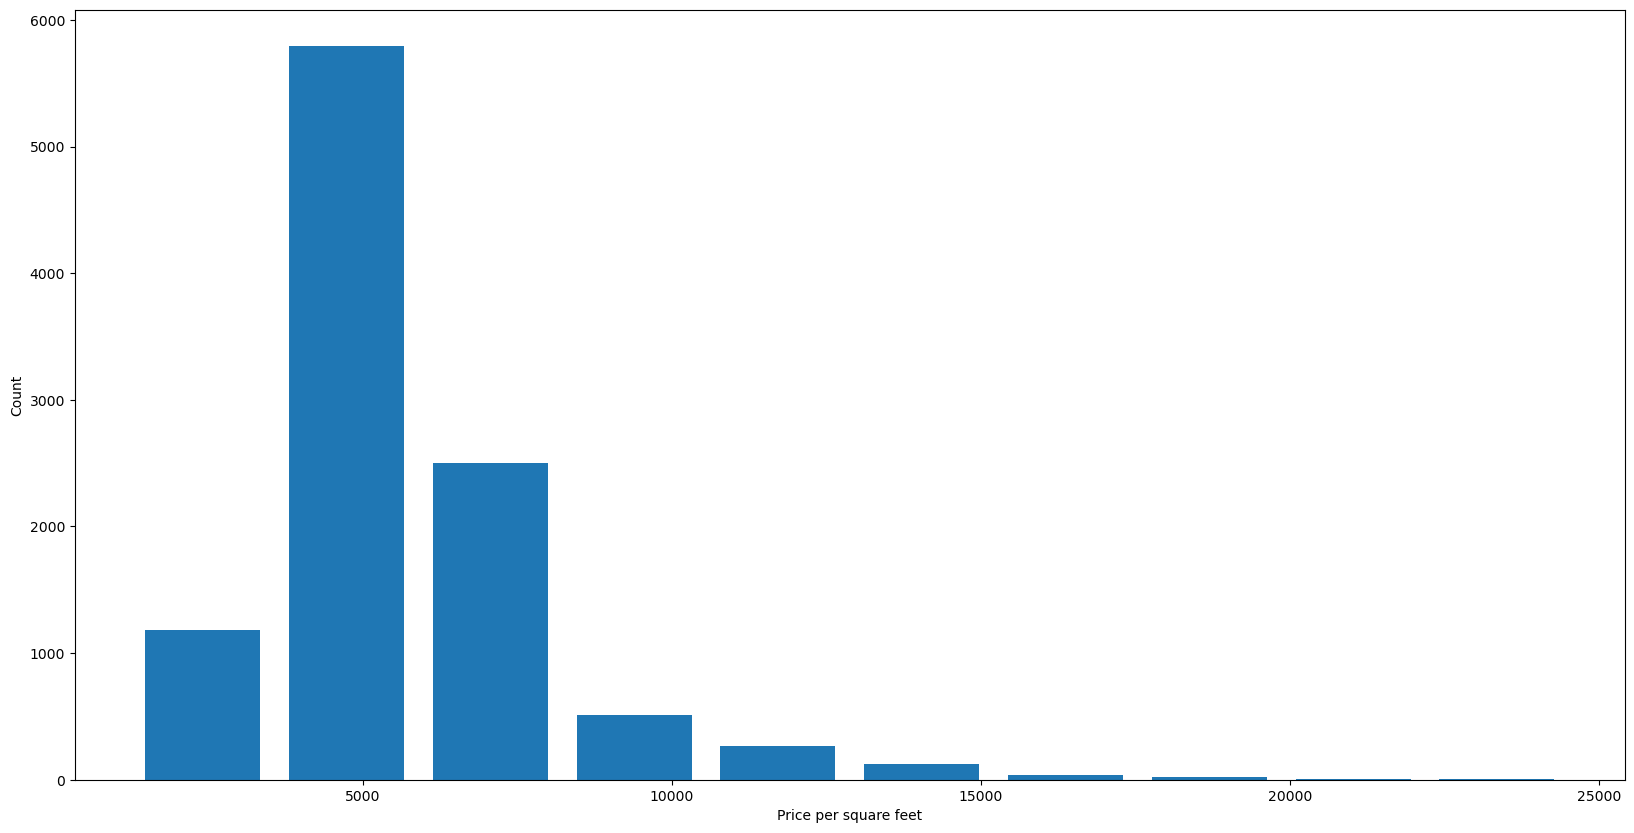

In [533]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(housing.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [534]:
housing.bath.unique()

<IntegerArray>
[4, 3, 2, 5, 8, 1, 6, 9, 7, 12, 16, 13]
Length: 12, dtype: Int64

In [535]:
housing=housing[housing.bath<housing.bhk+2]
housing.shape

(10361, 6)

In [536]:
housing.drop(['price_per_sqft'],axis='columns',inplace=True)

In [537]:
housing

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.00,4
1,1st Block Jayanagar,1630.0,3,194.00,3
2,1st Block Jayanagar,1875.0,2,235.00,3
3,1st Block Jayanagar,1200.0,2,130.00,3
4,1st Block Jayanagar,1235.0,2,148.00,2
...,...,...,...,...,...
10443,other,1353.0,2,110.00,2
10444,other,812.0,1,26.00,1
10445,other,1440.0,2,63.93,3
10446,other,1075.0,2,48.00,2


In [538]:
dummy_df=pd.get_dummies(housing.location)

In [539]:
housing=pd.concat([housing.drop('location',axis='columns'),dummy_df.drop('other',axis='columns')],axis='columns')

housing

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.00,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1630.0,3,194.00,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1875.0,2,235.00,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1200.0,2,130.00,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1235.0,2,148.00,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,1353.0,2,110.00,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [540]:
X=housing.drop('price',axis='columns')
y=housing.price

In [541]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [542]:
model=LinearRegression()

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8311826776087428

In [543]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0) #shuffles data for better testing
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.80058202, 0.81949522, 0.83712153, 0.76585296, 0.78315123])

In [544]:
def find_best_model_using_gridsearch(X,y):
    model_params= {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                #'normalize':[True,False] #deprecated and removed in all models for gridsearchcv
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree_regresson':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in model_params.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearch(X,y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 436, in _validate_params


,model,best_score,best_params
0,linear_regression,0.801241,{}
1,lasso,0.668966,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree_regresson,0.706979,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [545]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

predict_price('Indira Nagar',1000,2,2)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(173.1586200491185)

In [546]:
model.predict(X_test)

array([ 59.93770351,  37.16190335,  36.23078049, ...,  57.49477509,
        99.89907508, 104.61504862])

In [547]:
with open('bangalore_housing_prices_model.pickle','wb') as f:
    pickle.dump(model, f)

In [548]:
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))